In [ ]:
from sklearn.datasets import load_wine, fetch_california_housing, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_wine, fetch_california_housing, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colunas = [
    "area",
    "perimetro",
    "compacidade",
    "comprimento_nucleo",
    "largura_nucleo",
    "coeficiente_assimetria",
    "comprimento_sulco_nucleo",
    "variedade"
]

df = pd.read_csv("seeds_dataset.txt",
                 sep=r'\s+',
                 header=None,
                 names=colunas,
                )

df

,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coeficiente_assimetria,comprimento_sulco_nucleo,variedade
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
# Visão geral dos dados

print(df.info())
print()
print('---'*21)
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   area                      210 non-null    float64
 1   perimetro                 210 non-null    float64
 2   compacidade               210 non-null    float64
 3   comprimento_nucleo        210 non-null    float64
 4   largura_nucleo            210 non-null    float64
 5   coeficiente_assimetria    210 non-null    float64
 6   comprimento_sulco_nucleo  210 non-null    float64
 7   variedade                 210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB
None

---------------------------------------------------------------

             area   perimetro  compacidade  comprimento_nucleo  \
count  210.000000  210.000000   210.000000          210.000000   
mean    14.847524   14.559286     0.870999            5.628533   
std      2.909699    1.305

In [ ]:
# Médias

df.mean()

,0
area,14.847524
perimetro,14.559286
compacidade,0.870999
comprimento_nucleo,5.628533
largura_nucleo,3.258605
coeficiente_assimetria,3.700201
comprimento_sulco_nucleo,5.408071
variedade,2.000000


In [ ]:
# Tratamento de valores nulos (não há valores nulos)

df.isna().sum()

,0
area,0
perimetro,0
compacidade,0
comprimento_nucleo,0
largura_nucleo,0
coeficiente_assimetria,0
comprimento_sulco_nucleo,0
variedade,0


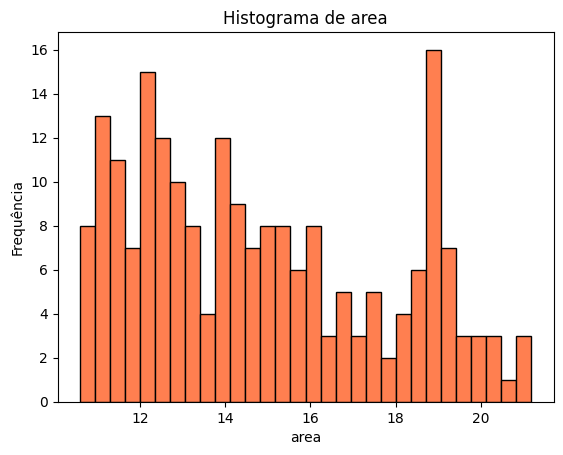

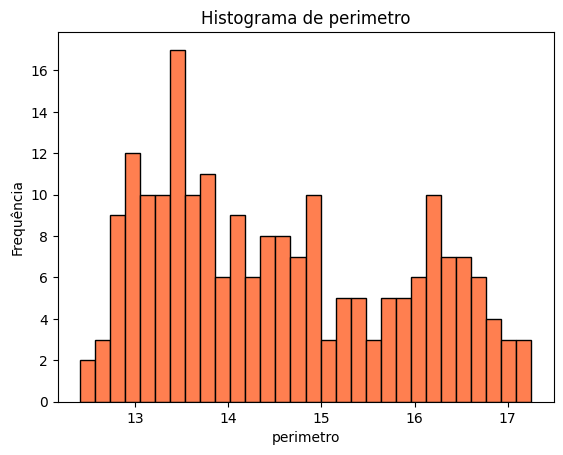

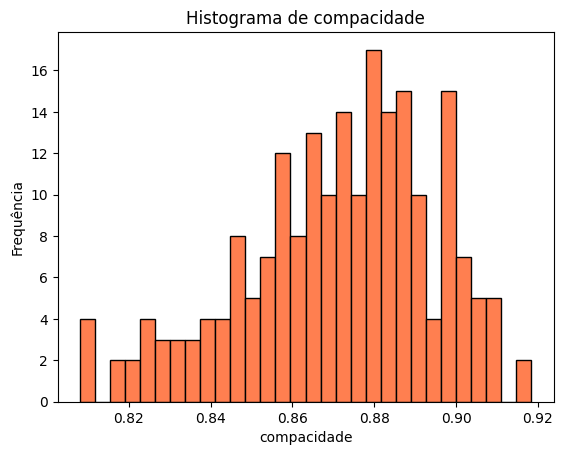

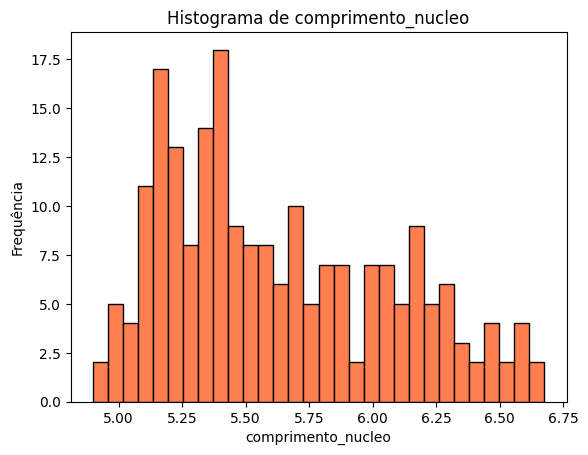

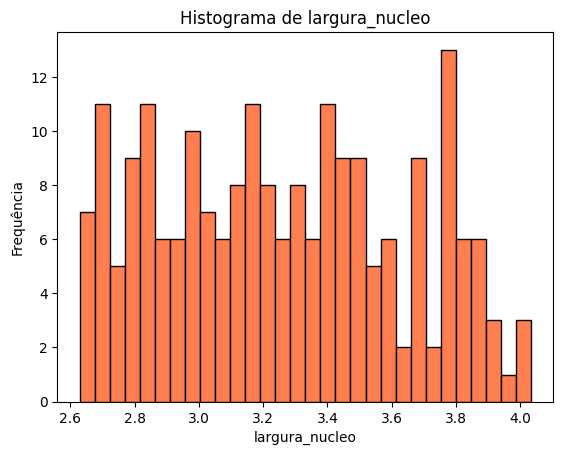

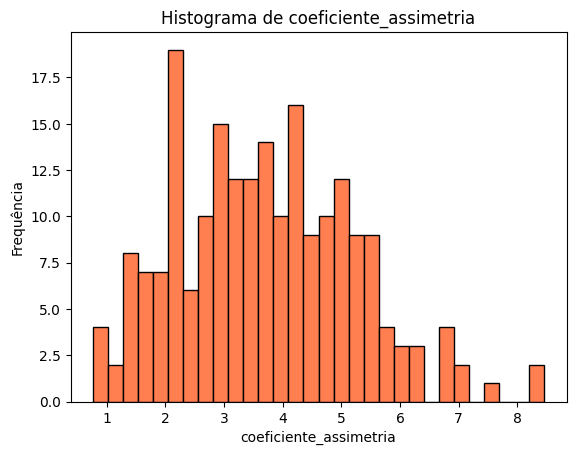

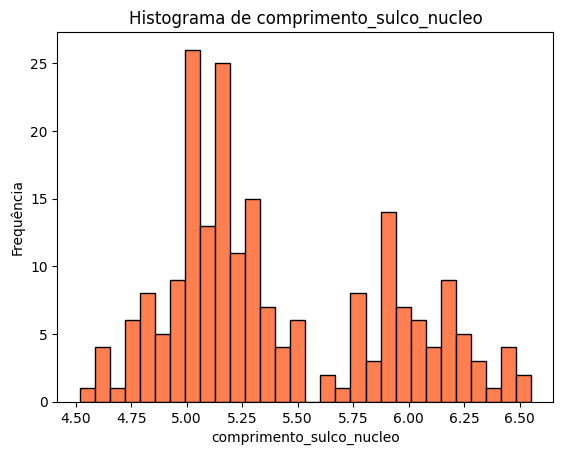

In [ ]:
# Histograma para visualização de frequência das features

cols = df.columns[:-1]

for col in cols:
    plt.hist(df[col], bins=30, color='coral', edgecolor='black')
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()


In [ ]:
# Modelos (KNN, SVC e Logistic Regression)

x = df.drop(columns=['variedade'])
y = df['variedade']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

In [ ]:
mn = MinMaxScaler()
x_train_scaled = mn.fit_transform(x_train)
x_test_scaled = mn.transform(x_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)
print(f'Acurácia: {accuracy_score(y_test, y_pred_knn):.2f}')
print()
print(f'{classification_report(y_test, y_pred_knn, target_names=['Kama','Rosa','Canadian'])}')

Acurácia: 0.95

              precision    recall  f1-score   support

        Kama       0.91      0.91      0.91        11
        Rosa       1.00      1.00      1.00        14
    Canadian       0.94      0.94      0.94        17

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42



In [ ]:
svc = SVC(kernel='poly')
svc.fit(x_train_scaled, y_train)
y_pred_svc = svc.predict(x_test_scaled)
print(f'Acurácia: {accuracy_score(y_test, y_pred_svc):.2f}')
print(f'{classification_report(y_test, y_pred_svc, target_names=['Kama','Rosa','Canadian'])}')

Acurácia: 0.90
              precision    recall  f1-score   support

        Kama       0.82      0.82      0.82        11
        Rosa       1.00      1.00      1.00        14
    Canadian       0.88      0.88      0.88        17

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(x_test_scaled)
print(f'Acurácia: {accuracy_score(y_test, y_pred_log_reg):.2f}')
print(classification_report(y_test, y_pred_log_reg, target_names=['Kama','Rosa','Canadian']))

Acurácia: 0.88
              precision    recall  f1-score   support

        Kama       0.75      0.82      0.78        11
        Rosa       1.00      1.00      1.00        14
    Canadian       0.88      0.82      0.85        17

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42

